# 机器学习工程师纳米学位
## 深度学习
## 项目：搭建一个数字识别项目

在此文件中，我们提供给你了一个模板，以便于你根据项目的要求一步步实现要求的功能，进而完成整个项目。如果你认为需要导入另外的一些代码，请确保你正确导入了他们，并且包含在你的提交文件中。以**'练习'**开始的标题表示接下来你将开始实现你的项目。注意有一些练习是可选的，并且用**'可选'**标记出来了。

在此文件中，有些示例代码已经提供给你，但你还需要实现更多的功能让项目成功运行。除非有明确要求，你无须修改任何已给出的代码。以'练习'开始的标题表示接下来的代码部分中有你必须要实现的功能。每一部分都会有详细的指导，需要实现的部分也会在注释中以'TODO'标出。请仔细阅读所有的提示！

除了实现代码外，你还必须回答一些与项目和你的实现有关的问题。每一个需要你回答的问题都会以**'问题 X'**为标题。请仔细阅读每个问题，并且在问题后的**'回答'**文字框中写出完整的答案。我们将根据你对问题的回答和撰写代码所实现的功能来对你提交的项目进行评分。

>**注意：** Code 和 Markdown 区域可通过 **Shift + Enter** 快捷键运行。此外，Markdown可以通过双击进入编辑模式。

----
## 步骤 1: 设计并测试一个模型架构
设计并实现一个能够识别数字序列的深度学习模型。你可以通过连接[notMNIST](http://yaroslavvb.blogspot.com/2011/09/notmnist-dataset.html)或者是[MNIST](http://yann.lecun.com/exdb/mnist/)的字符来合成数据来训练这个模型。为了产生用于测试的合成数字序列，你可以进行如下的设置：比如，你可以限制一个数据序列最多五个数字，并在你的深度网络上使用五个分类器。同时，你有必要准备一个额外的“空白”的字符，以处理相对较短的数字序列。

在思考这个问题的时候有很多方面可以考虑：
- 你的模型可以基于深度神经网络或者是卷积神经网络。
- 你可以尝试是否在softmax分类器间共享权值。
- 你还可以在深度神经网络中使用循环网络来替换其中的分类层，并且将数字序列里的数字一个一个地输出。

这里有一个[发表的关于这个问题的基准模型的论文](http://static.googleusercontent.com/media/research.google.com/en//pubs/archive/42241.pdf)([视频](https://www.youtube.com/watch?v=vGPI_JvLoN0))的例子

### 实现
使用下面的代码单元（必要的话可以使用多个代码单元）来实现你项目的第一步。一旦你完成了你的实现并且获得了满意的结果，请确认全面回答下面相关的问题。

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from six.moves import cPickle as pickle
from scipy.misc import imresize, imread
import cv2
%matplotlib inline

In [4]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=False)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


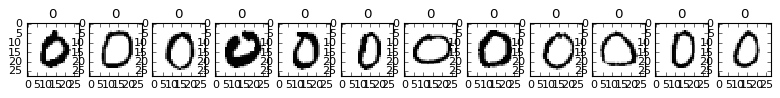

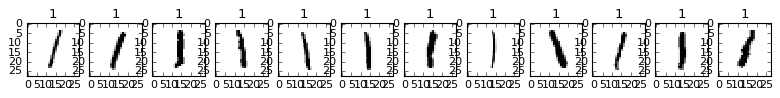

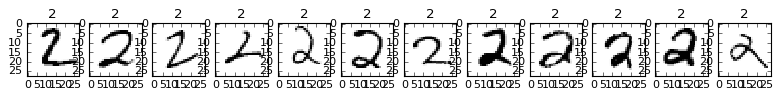

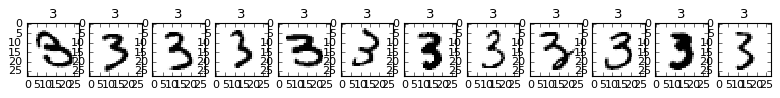

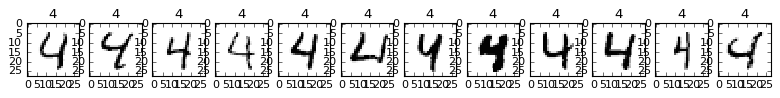

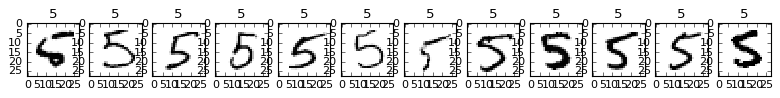

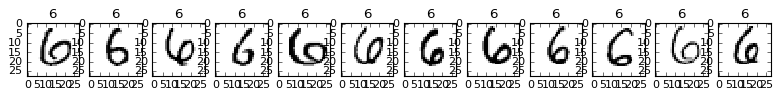

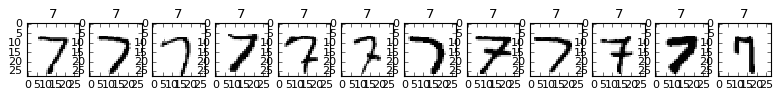

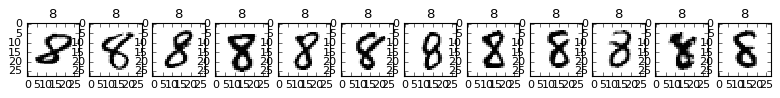

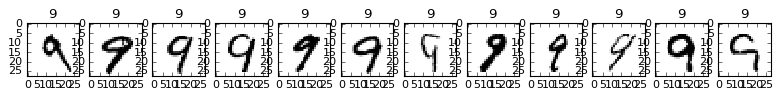

In [5]:
img_size = 28
def data_check(data):
    img_labels = pd.DataFrame(data.labels)
    img_data =(data.images * 255).astype(int)
    img_data = img_data.reshape(img_data.shape[0], img_size, img_size)
    for i in range(10):
        show_labels = img_labels.loc[img_labels[0] == i]
        fig = plt.figure(figsize=(12, 3), dpi=80)
        for j in range(12):
            plt.subplot(1,12,j+1)
            plt.title(i)
            plt.imshow(img_data[show_labels.index[j]], interpolation='nearest',cmap='Greys')
data_check(mnist.test)

In [2]:
def get_random_image(label, data):
    img_labels = pd.DataFrame(data.labels)
    show_labels = img_labels.loc[img_labels[0] == label]
    indices = np.random.randint(0,len(show_labels))
    return data.images[show_labels.index[indices]]
    
def generate_data(numbers,data):
    labels = np.zeros((numbers, 5, 11))
    img_data = np.zeros((numbers, 64, 64))
    random_data = np.random.randint(1, 6, numbers)
    for indices, random_length in enumerate(random_data):
        number_image = np.zeros((28,28*random_length))
        random_digits = np.random.randint(10 ** (random_length-1), 10 ** random_length)
        for i in range(random_length)[::-1]:
            j = random_length - i - 1
            label = np.mod(random_digits // (10 ** i),10)
            labels[indices][j][label] = 1
            #print(number_image.shape)
            number_image[0:28 , 28*j :28*(j+1)] = get_random_image(label, data).reshape(img_size, img_size)
        #fig = plt.figure(figsize=(12, 3), dpi=80)
        #plt.imshow(number_image, interpolation='nearest', cmap= 'Greys')
        img_data[indices,:] = imresize(number_image, size=(64,64))
        #tf.image.resize_images(number_image, new_height=64, new_width=64)
        for i,j in enumerate(labels[indices]):
            if np.sum(labels[indices, i]) == 0:
                labels[indices][i][10] = 1
    return img_data, labels
                      
def check_generate_data(img_data, labels, numbers = 0):
    print([0,1,2,3,4,5,6,7,8,9,'B'])
    print(labels[numbers,:])
    img_data = img_data.reshape(img_data.shape[0],img_data.shape[1], img_data.shape[2])
    plt.imshow(img_data[numbers] * 255,  interpolation='nearest', cmap= 'Greys')

def loadPickle(file):
    try:
        with open(file, 'rb') as pickle_file:
            return pickle.load(pickle_file)
            print(file,'peckled!')
    except Exception as e:
        print('Unable to load', file, ':' , e)
        
def saveAsPickle(data,filename):
    try:
        with open(filename, 'wb') as f:
            pickle.dump(data, f, pickle.HIGHEST_PROTOCOL)
            print (filename + " pickled!")
    except Exception as e:
        print('Unable to save data to', filename, ':', e)
        
def load_or_generate_data(numbers, mnistdata, datapath, labelspath):
    if os.path.exists(datapath) & os.path.exists(labelspath):
        data = loadPickle(datapath)
        labels = loadPickle(labelspath)
    else :
        print('File not exist, will generate data soon...')
        data, labels = generate_data(numbers, mnistdata)
        saveAsPickle(data, datapath)
        saveAsPickle(labels,labelspath)
    return data, labels

In [44]:
data , labels = load_or_generate_data(60000, mnist.train, 'mnist_data.pickle', 'mnist_labels.pickle')

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 'B']
[[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]]


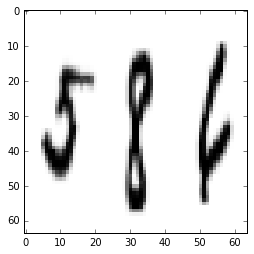

In [45]:
check_generate_data(data, labels,200)

In [46]:
data = data.reshape(data.shape[0], data.shape[1], data.shape[2], 1)

In [47]:
print(data.shape)
print(labels.shape)

(60000, 64, 64, 1)
(60000, 5, 11)


In [48]:
from sklearn.model_selection import train_test_split
train_dataset, test_dataset, train_labels, test_labels = train_test_split(
    data, labels, test_size = 10000)

In [49]:
train_labels = [train_labels[:,0,:],train_labels[:,1,:],train_labels[:,2,:],train_labels[:,3,:],train_labels[:,4,:]]
test_labels = [test_labels[:,0,:],test_labels[:,1,:],test_labels[:,2,:],test_labels[:,3,:],test_labels[:,4,:]]

In [50]:
from keras.layers import merge, Convolution2D, MaxPooling2D, Input, Dense, Flatten, Dropout
from keras.regularizers import l2, activity_l2
from keras.models import Model

In [53]:
model.fit(train_dataset, train_labels, batch_size = 128, nb_epoch = 30, verbose=2, validation_split=0.1)

Train on 45000 samples, validate on 5000 samples
Epoch 1/30
26s - loss: 8.3329 - output0_loss: 2.2395 - output1_loss: 2.1313 - output2_loss: 1.7650 - output3_loss: 1.2952 - output4_loss: 0.8182 - output0_acc: 0.1180 - output1_acc: 0.2284 - output2_acc: 0.4181 - output3_acc: 0.6095 - output4_acc: 0.8019 - val_loss: 6.8626 - val_output0_loss: 2.2121 - val_output1_loss: 1.8617 - val_output2_loss: 1.4024 - val_output3_loss: 0.9205 - val_output4_loss: 0.4658 - val_output0_acc: 0.1254 - val_output1_acc: 0.2810 - val_output2_acc: 0.4562 - val_output3_acc: 0.6434 - val_output4_acc: 0.8228
Epoch 2/30
25s - loss: 6.8468 - output0_loss: 2.0742 - output1_loss: 1.8650 - output2_loss: 1.4169 - output3_loss: 0.9484 - output4_loss: 0.4791 - output0_acc: 0.1820 - output1_acc: 0.2877 - output2_acc: 0.4598 - output3_acc: 0.6406 - output4_acc: 0.8193 - val_loss: 6.3652 - val_output0_loss: 1.7998 - val_output1_loss: 1.8211 - val_output2_loss: 1.3803 - val_output3_loss: 0.9082 - val_output4_loss: 0.4558 - v

In [54]:
model.evaluate(test_dataset, test_labels, batch_size=1000, verbose=1)

10000/10000 [==============================] - 2s     


[0.28519238978624345,
 0.08766456060111523,
 0.067017098702490327,
 0.050958746112883091,
 0.045775654166936873,
 0.033776328153908255,
 0.98470000624656673,
 0.98540001511573794,
 0.99090002179145809,
 0.99120001196861263,
 0.99280000925064082]

In [55]:
predict_labels = model.predict(test_dataset)

In [56]:
prediction = np.zeros([10000, 5, 11])
for i in range(5):
    prediction[:,i,:] = predict_labels[i]

In [57]:
def check_predict(img_data, prediction, numbers = 0):
    predict = []
    for i in prediction[numbers]:
        predict.append(np.argmax(i))
    print('The prediction is ', predict)
    img_data = img_data.reshape(img_data.shape[0],img_data.shape[1], img_data.shape[2])
    plt.imshow(img_data[numbers] * 255,  interpolation='nearest', cmap= 'Greys')

('The prediction is ', [5, 10, 10, 10, 10])


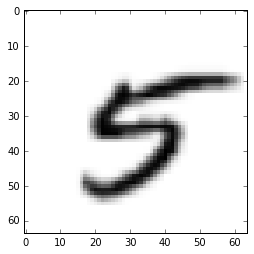

In [58]:
check_predict(test_dataset, prediction, 1)

In [59]:
with open('mnist_model.json', 'w') as f:
    f.write(model.to_json())
model.save_weights('mnist_model.h5', overwrite=True)

In [18]:
def accuracy(y_true,y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    right = 0.
    for i in range(y_pred.shape[1]):
        final_predict = []
        true_labels = []
        for j in range(y_pred.shape[0]):
            final_predict.append(np.argmax(y_pred[j,i,:]))
            true_labels.append(np.argmax(y_true[j,i,:]))
        if final_predict == true_labels:
            right += 1.
    acc = right / y_true.shape[1]
    print('Model accuracy is ' + str(acc) )
            

In [61]:
accuracy(test_labels,predict_labels)

Model accuracy is 0.9469


### 问题 1
_你为解决这个问题采取了什么方法？_

**回答：**
* 一、我采用了卷积神经网络来训练模型，一开始我学习了tensoflow的教程，建立了简单的6层神经网络来训练数据，主要包含了输入层、卷积层、池化层、密集连接层、以及随机删除节点层，这时模型虽然能够预测但是效果非常不好，一是每个数字标签的准确率大概只有75左右，用个人电脑训练的速度也非常差。
* 二、使用aws提高模型的计算效率、学习使用keras快速增加模型的层数，从而提升整体的模型训练效率和预测准确度。

** ** 最终模型每个标签预测的准确率达到了98%以上，生成的图片最终预测准确率达到了94.69%

### 问题 2
_你最终的模型架构是什么样的？（什么类型的模型，层数，大小, 连接性等）_

__________________________________________________________________

**回答：**

我最终的模型是模仿VGG16设置的模型，但为了提高训练效率，我适当减少了每个圈基层的核数目，共有5个block，每个block中分别包含了2-3个卷积层和1个池化层，最后包含了一个平滑连接层将立体的数据转化为向量，以及2个（全连接+dropout层），最后将最终的连接层分别与5个softmax全连接层相连


|Layer (type)            |         Output Shape     |     Param #  |   Connected to                |                     
|-----------------------------|--------------------------------|----------------|---------------------------------------|
|input_5 (InputLayer)       |      (None, 64, 64, 1)    |       0     |              |      
|block1_conv1 (Convolution2D) |    (None, 64, 64, 8)       |   80       |   input_5[0][0]            |        
|block1_conv2 (Convolution2D) |    (None, 64, 64, 8)       |   584      |   block1_conv1[0][0]              | 
|block1_pool (MaxPooling2D)  |     (None, 32, 32, 8)      |    0       |    block1_conv2[0][0]              | 
|block2_conv1 (Convolution2D) |    (None, 32, 32, 16)      |   1168       | block1_pool[0][0]               | 
|block2_conv2 (Convolution2D) |    (None, 32, 32, 16)       |   2320      |  block2_conv1[0][0]              | 
|block2_pool (MaxPooling2D)  |     (None, 16, 16, 16) |   0           |block2_conv2[0][0]              | 
|block3_conv1 (Convolution2D) |    (None, 16, 16, 32)  |  4640        |block2_pool[0][0]               | 
|block3_conv2 (Convolution2D) |    (None, 16, 16, 32)  |  9248        |block3_conv1[0][0]              | 
|block3_conv3 (Convolution2D) |    (None, 16, 16, 32)  |  9248        |block3_conv2[0][0]              | 
|block3_pool (MaxPooling2D)  |     (None, 8, 8, 32)  |    0        |   block3_conv3[0][0]              | 
|block4_conv1 (Convolution2D) |    (None, 8, 8, 64)   |   18496      | block3_pool[0][0]               | 
|block4_conv2 (Convolution2D) |    (None, 8, 8, 64)   |   36928      | block4_conv1[0][0]              | 
|block4_conv3 (Convolution2D) |    (None, 8, 8, 64)   |   36928      | block4_conv2[0][0]              | 
|block4_pool (MaxPooling2D)  |     (None, 4, 4, 64)  |    0         |  block4_conv3[0][0]              | 
|block5_conv1 (Convolution2D) |    (None, 4, 4, 64)   |   36928       |block4_pool[0][0]               | 
|block5_conv2 (Convolution2D) |    (None, 4, 4, 64)   |   36928       |block5_conv1[0][0]              | 
|block5_conv3 (Convolution2D) |    (None, 4, 4, 64)   |   36928       |block5_conv2[0][0]              | 
|block5_pool (MaxPooling2D)  |     (None, 2, 2, 64)  |    0          | block5_conv3[0][0]              | 
|flatten (Flatten)        |        (None, 256)   |        0     |      block5_pool[0][0]               | 
|drop1 (Dropout)         |         (None, 256)  |         0    |       flatten[0][0]                   | 
|fc1 (Dense)            |          (None, 2048)|          526336 |     drop1[0][0]                    | 
|drop2 (Dropout)         |         (None, 2048)  |        0      |     fc1[0][0]          |              
|fc2 (Dense)            |          (None, 1024) |         2098176 |    drop2[0][0]               |       
|drop3 (Dropout)         |         (None, 1024)   |       0      |     fc2[0][0]                       | 
|output0 (Dense)         |         (None, 11)     |       11275   |    drop3[0][0]                     | 
|output1 (Dense)         |         (None, 11)      |      11275    |   drop3[0][0]                     | 
|output2 (Dense)         |         (None, 11)       |     11275   |    drop3[0][0]                     | 
|output3 (Dense)         |         (None, 11)        |    11275    |   drop3[0][0]                     | 
|output4 (Dense)         |         (None, 11)        |    11275    |   drop3[0][0]                     | 
Total params: 2911311
__________________________________

### 问题 3
_你是如何训练你的模型的？你是如何合成数据集的？_请同时包括你创建的合成数据中的一些示例图像。

**回答：** 

训练模型：
* 一开始训练模型的时候，我是学习使用udacity深度学习课程中tensorflow的训练方法，由于不太擅长文件读取方面的函数，因此首先将全部的数据存入内存，然后每次生成一个batch_size的数据。最终，使用keras之后，只需要使用泛型模型的Model.fit()函数就可以直接设置不同的batch_size和训练次数。

合成数据集：

* 1、模拟房门数据，我用随机函数设置了60000个[1,5]的数字长度；
* 2、用随机函数生成了不同长度的数字作为标签；
* 3、根据数字标签随机抽取mnist中的图片合成一张64*64的图片数据；
* 4、将每个数字标签转变成[5,11]的而分类变量，其中5是数字的长度，11分别代表数字0，1，2，3，4，5，6，7，8，9和空。

合成数据的示例和预测图像已在代码中展示。

----
## 步骤 2: 在真实数据集上训练一个模型

一旦你确定好了一个好的模型架构，你就可以开始在真实的数据上训练你的模型了。特别地，[街景房屋门牌号(SVHN)](http://ufldl.stanford.edu/housenumbers/)数据集是一个大规模的，从谷歌街景数据中采集的门牌号数据。在这个更有挑战性的数据集（这里数字不是整齐排列的，并且会有各种倾斜、字体和颜色）上训练，可能意味着你必须做一些超参数探索以获得一个表现良好的模型。

### 实现
使用下面的代码单元（必要的话可以使用多个代码单元）来实现你项目。一旦你完成了你的实现并且获得了满意的结果，请确认全面回答下面相关的问题。

In [3]:
from six.moves.urllib.request import urlretrieve
from IPython.display import Image, display
from skimage import novice
from keras.preprocessing import image
from keras.callbacks import TensorBoard
import tarfile

Using TensorFlow backend.


In [4]:
def maybe_download(base_url, dest_folder, filename, expected_bytes=None):
    """Download a file if not present, and make sure it's the right size."""
    if not os.path.exists(dest_folder):
        os.makedirs(dest_folder)
    filepath = os.path.join(dest_folder,filename)
    if not os.path.exists(filepath):
        filepath, _ = urlretrieve(base_url + filename, filepath)
    statinfo = os.stat(filepath)
    if expected_bytes is None or statinfo.st_size == expected_bytes:
        print('Found and verified %s' % filename)
    else:
        print(statinfo.st_size)
        raise Exception(
            'Failed to verify ' + filename + '. Can you get to it with a browser?')
    return filename

def maybe_untargz(filename, dest_folder,force=False):
    extraction_dir = filename.split(".")[0]
    if not os.path.isdir(extraction_dir):
        tar = tarfile.open(filename, "r:gz")
        tar.extractall(dest_folder)
        tar.close()
        print (filename + " extracted to " + extraction_dir)
    else:
        print ("Folder " + extraction_dir + " already exists. Skipping")

In [5]:
svhn_base_url = "http://ufldl.stanford.edu/housenumbers/"
svhn_dest_folder = "svhn/"

svhn_train_format_1 = maybe_download(svhn_base_url,svhn_dest_folder, "train.tar.gz")
svhn_test_format_1 = maybe_download(svhn_base_url,svhn_dest_folder, "test.tar.gz")
#svhn_extra_format_1 = maybe_download(svhn_base_url,svhn_dest_folder, "extra.tar.gz")

     
maybe_untargz(os.path.join(svhn_dest_folder,"train.tar.gz"), svhn_dest_folder)
maybe_untargz(os.path.join(svhn_dest_folder,"test.tar.gz"), svhn_dest_folder)
#maybe_untargz(os.path.join(svhn_dest_folder,"extra.tar.gz"), svhn_dest_folder)

Found and verified train.tar.gz
Found and verified test.tar.gz
Folder svhn/train already exists. Skipping
Folder svhn/test already exists. Skipping


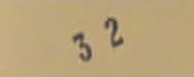

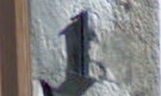

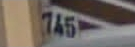

In [6]:
imagesPath = os.path.join(svhn_dest_folder,'train')
imagesNames = [f for f in os.listdir(imagesPath) if f.endswith('.png')][:3]
for imageName in imagesNames:
    display(Image(filename=os.path.join(imagesPath,imageName)))

In [7]:
# using https://github.com/sarahrn/Py-Gsvhn-DigitStruct-Reader to convert .mat files to .csv
import digitStructMatToCsv
def matToCsv(sourceMat, destCsv, force=False):
    if (os.path.isfile(destCsv)):
        print (sourceMat + " already converted to " + destCsv)
    else:
        csvFile = open(destCsv, 'w')
        digitStructMatToCsv.writeToCsvFile(sourceMat, csvFile)
        csvFile.close()
        print (sourceMat + " converted to " + destCsv)

# Convert
matToCsv(os.path.join(svhn_dest_folder,"train","digitStruct.mat")
         ,os.path.join(svhn_dest_folder,"train","digitStruct.csv"))
matToCsv(os.path.join(svhn_dest_folder,"test","digitStruct.mat")
         ,os.path.join(svhn_dest_folder,"test","digitStruct.csv"))
#matToCsv(os.path.join(svhn_dest_folder,"extra","digitStruct.mat")
#         ,os.path.join(svhn_dest_folder,"extra","digitStruct.csv"))

# Display 
svhn_train_digit_info = pd.read_csv(os.path.join(svhn_dest_folder,"train","digitStruct.csv"))
svhn_test_digit_info = pd.read_csv(os.path.join(svhn_dest_folder,"test","digitStruct.csv"))
#svhn_extra_digit_info = pd.read_csv(os.path.join(svhn_dest_folder,"extra","digitStruct.csv"))
display(svhn_train_digit_info.head())
display(svhn_test_digit_info.head())
#display(svhn_extra_digit_info.head())

svhn/train/digitStruct.mat already converted to svhn/train/digitStruct.csv
svhn/test/digitStruct.mat already converted to svhn/test/digitStruct.csv


,FileName,DigitLabel,Left,Top,Width,Height
0,1.png,1,246,77,81,219
1,1.png,9,323,81,96,219
2,2.png,2,77,29,23,32
3,2.png,3,98,25,26,32
4,3.png,2,17,5,8,15


,FileName,DigitLabel,Left,Top,Width,Height
0,1.png,5,43,7,19,30
1,2.png,2,99,5,14,23
2,2.png,1,114,8,8,23
3,2.png,10,121,6,12,23
4,3.png,6,61,6,11,16


In [8]:
def create_svhn_metadata(image_folder,dataframe):
    df = pd.DataFrame(columns=('filename', 'value', 'digits', 'length', 'width', 'height','box'))
    current_image_file = ""
    digits = []
    left = top = 999999
    right = bottom = 0
    for i,row in dataframe.iterrows():
        
        if current_image_file != row['FileName']:
            if len(digits) > 0:
                img = novice.open(os.path.join(image_folder,current_image_file))
                df.loc[len(df)] = [current_image_file ,int("".join(str(x) for x in digits)), digits, len(digits), img.width, img.height,[left,top,right,bottom]]
            current_image_file = row['FileName']
            digits = []
            left = top = 999999
            right = bottom = 0
            
        # Since 0 are encoded as 10 in the mat and csv. we substite 10 with 0    
        digit = 0 if row['DigitLabel'] == 10 else row['DigitLabel']
        # The street number surrounding crop box
        left = min(row['Left'],left)
        top = min(row['Top'],top)
        right = max(row['Left'] + row['Width'],right)
        bottom = max(row['Top'] + row['Height'],bottom)
        digits.append(digit)

    return df

## 已完成可以跳过这一步

In [9]:
svhn_train_df = create_svhn_metadata(os.path.join(svhn_dest_folder,"train"),svhn_train_digit_info)
#svhn_test_df = create_svhn_metadata(os.path.join(svhn_dest_folder,"test"),svhn_test_digit_info)
#svhn_extra_df = create_svhn_metadata(os.path.join(svhn_dest_folder,"extra"),svhn_extra_digit_info)

saveAsPickle(svhn_train_df, os.path.join(svhn_dest_folder,"train","digitStruct.dataframe"))
#saveAsPickle(svhn_test_df, os.path.join(svhn_dest_folder,"test","digitStruct.dataframe"))
#saveAsPickle(svhn_extra_df, os.path.join(svhn_dest_folder,"extra","digitStruct.dataframe"))

svhn/train/digitStruct.dataframe pickled!


## 直接load数据

In [6]:
svhn_train_df = loadPickle(os.path.join(svhn_dest_folder,"train","digitStruct.dataframe"))
svhn_test_df = loadPickle(os.path.join(svhn_dest_folder,"test","digitStruct.dataframe"))
#svhn_extra_df = loadPickle(os.path.join(svhn_dest_folder,"extra","digitStruct.dataframe"))

display(svhn_train_df.head())
display(svhn_test_df.head())
#display(svhn_extra_df.head())

,filename,value,digits,length,width,height,box
0,1.png,19.0,"[1, 9]",2.0,741.0,350.0,"[246, 77, 419, 300]"
1,2.png,23.0,"[2, 3]",2.0,199.0,83.0,"[77, 25, 124, 61]"
2,3.png,25.0,"[2, 5]",2.0,52.0,23.0,"[17, 5, 34, 20]"
3,4.png,93.0,"[9, 3]",2.0,161.0,79.0,"[57, 13, 85, 47]"
4,5.png,31.0,"[3, 1]",2.0,140.0,68.0,"[52, 7, 89, 56]"


,filename,value,digits,length,width,height,box
0,1.png,5.0,[5],1.0,99.0,47.0,"[43, 7, 62, 37]"
1,2.png,210.0,"[2, 1, 0]",3.0,182.0,48.0,"[99, 5, 133, 31]"
2,3.png,6.0,[6],1.0,101.0,31.0,"[61, 6, 72, 22]"
3,4.png,1.0,[1],1.0,75.0,31.0,"[32, 6, 46, 23]"
4,5.png,9.0,[9],1.0,215.0,81.0,"[97, 28, 116, 56]"


In [11]:
print ("TRAINING")
print ("Max value: %d" % int(svhn_train_df['value'].max()))
print ("Min value: %d" % int(svhn_train_df['value'].min()))
print ("Max length: %d" % int(svhn_train_df['length'].max()))
print ("Min length: %d" % int(svhn_train_df['length'].min()))

#print ("\nEXTRA")
#print ("Max value: %d" % int(svhn_extra_df['value'].max()))
#print ("Min value: %d" % int(svhn_extra_df['value'].min()))
#print ("Max length: %d" % int(svhn_extra_df['length'].max()))
#print ("Min length: %d" % int(svhn_extra_df['length'].min()))

TRAINING
Max value: 135458
Min value: 0
Max length: 6
Min length: 1


In [7]:
svhn_train_df = svhn_train_df.loc[svhn_train_df.value != 0].reset_index(drop= True)
svhn_test_df = svhn_test_df.loc[svhn_test_df.value != 0].reset_index(drop= True)

## 使用原图进行训练，作为基准准确率

In [8]:
def svhn_file_to_data1(dataframe, dest_folder):
    data = np.zeros([dataframe.shape[0] , 128 , 128, 3])
    labels = np.zeros([dataframe.shape[0], 6, 11])
    for indices, row in dataframe.iterrows():
        img = cv2.imread(dest_folder + row.filename)
        #bin_img = cv2.adaptiveThreshold(img1,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,25,25)
        resize_img = imresize(img, size=(128,128))
        data[indices,:,:,:] = resize_img
        for i in range(int(row.length))[::-1]:
            j = int(row.length) - i - 1
            label = np.mod(int(row.value) // (10 ** i),10)
            labels[indices][j][label] = 1
        for i,j in enumerate(labels[indices]):
            if np.sum(labels[indices, i]) == 0:
                labels[indices][i][10] = 1
    
    return data, labels

In [9]:
svhn_train_dataset, svhn_train_labels = svhn_file_to_data1(svhn_train_df, 'svhn/train/')
svhn_test_dataset, svhn_test_labels = svhn_file_to_data1(svhn_test_df, 'svhn/test/')

In [10]:
def check_svhn_data(img_data, labels, numbers = 0):
    print([0,1,2,3,4,5,6,7,8,9,'B'])
    print(labels[numbers,:])
    img_data = img_data.reshape(img_data.shape[0],img_data.shape[1], img_data.shape[2],img_data.shape[3])
    plt.imshow(img_data[numbers])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 'B']
[[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]]


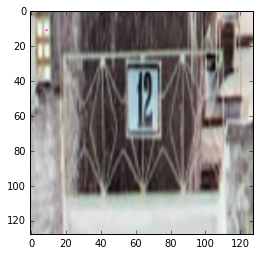

In [11]:
check_svhn_data(svhn_train_dataset, svhn_train_labels,10000)

In [12]:
svhn_train_labels = [svhn_train_labels[:,0,:],svhn_train_labels[:,1,:],svhn_train_labels[:,2,:],svhn_train_labels[:,3,:],svhn_train_labels[:,4,:],svhn_train_labels[:,5,:]]
svhn_test_labels = [svhn_test_labels[:,0,:],svhn_test_labels[:,1,:],svhn_test_labels[:,2,:],svhn_test_labels[:,3,:],svhn_test_labels[:,4,:],svhn_test_labels[:,5,:]]

In [13]:
from keras.layers import merge, Convolution2D, MaxPooling2D, Input, Dense, Flatten, Dropout
from keras.regularizers import l2, activity_l2
from keras.models import Model

In [14]:
digit_input = Input(shape = (128 ,128, 3))

cov_layer1 = Convolution2D(16,3,3, activation='relu' , border_mode='same' , subsample=(2,2))(digit_input)

cov_layer2 = Convolution2D(32, 3 ,3, activation= 'relu', border_mode = 'same', subsample = (2,2))(cov_layer1)

pool_layer1 = MaxPooling2D(pool_size = (2,2), strides=(2,2))(cov_layer2)

cov_layer3 = Convolution2D(64, 3, 3, activation = 'relu', border_mode = 'same', subsample = (2,2))(pool_layer1)

cov_layer4 = Convolution2D(128, 3, 3, activation = 'relu', border_mode = 'same', subsample = (2,2))(cov_layer3)

pool_layer2 =  MaxPooling2D(pool_size = (1,1), strides=(1,1))(cov_layer4)


flat_layer = Flatten()(pool_layer2)

fc_layer = Dense(2048)(flat_layer)

drop_layer = Dropout(0.9)(fc_layer)

outputs = []

for i in range(6):
    y = Dense(1024)(drop_layer)
    output = Dense(11,activation = 'softmax', name = 'output'+ str(i))(y)
    outputs.append(output)
model = Model(input = digit_input, output = outputs)

model.compile(optimizer = 'adadelta', loss = 'categorical_crossentropy',
              metrics={'output0':'accuracy','output1':'accuracy','output2':'accuracy',
                       'output3':'accuracy','output4':'accuracy','output5':'accuracy','outputs':'accuracy'})
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 128, 128, 3)   0                                            
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 64, 64, 16)    448         input_1[0][0]                    
____________________________________________________________________________________________________
convolution2d_2 (Convolution2D)  (None, 32, 32, 32)    4640        convolution2d_1[0][0]            
____________________________________________________________________________________________________
maxpooling2d_1 (MaxPooling2D)    (None, 16, 16, 32)    0           convolution2d_2[0][0]            
___________________________________________________________________________________________

In [15]:
model.fit(
    svhn_train_dataset, svhn_train_labels,
    batch_size = 128, nb_epoch = 30, verbose=2, validation_split=0.1,
    callbacks=[TensorBoard(log_dir='/tmp/model1')])

Train on 30010 samples, validate on 3335 samples
Epoch 1/30
38s - loss: 6.2538 - output0_loss: 2.0788 - output1_loss: 2.3993 - output2_loss: 1.3906 - output3_loss: 0.3209 - output4_loss: 0.0343 - output5_loss: 0.0301 - output0_acc: 0.2586 - output1_acc: 0.1411 - output2_acc: 0.6892 - output3_acc: 0.9534 - output4_acc: 0.9956 - output5_acc: 0.9963 - val_loss: 6.1202 - val_output0_loss: 2.0305 - val_output1_loss: 2.3374 - val_output2_loss: 1.4369 - val_output3_loss: 0.3005 - val_output4_loss: 0.0095 - val_output5_loss: 0.0055 - val_output0_acc: 0.2753 - val_output1_acc: 0.1886 - val_output2_acc: 0.6975 - val_output3_acc: 0.9544 - val_output4_acc: 0.9997 - val_output5_acc: 1.0000
Epoch 2/30
30s - loss: 5.6682 - output0_loss: 1.9828 - output1_loss: 2.2326 - output2_loss: 1.1972 - output3_loss: 0.2495 - output4_loss: 0.0044 - output5_loss: 0.0016 - output0_acc: 0.2870 - output1_acc: 0.2168 - output2_acc: 0.6959 - output3_acc: 0.9569 - output4_acc: 0.9997 - output5_acc: 1.0000 - val_loss: 5.

In [16]:
model.evaluate(svhn_test_dataset, svhn_test_labels, batch_size=128, verbose=1)

13054/13054 [==============================] - 7s     

[5.8550630535559982,
 2.184520185715173,
 2.394719019150942,
 1.1728555163691343,
 0.10050155570031682,
 0.0024657382302894749,
 1.0169539794809521e-06,
 0.48153822668044,
 0.40432051481213632,
 0.73065727055118446,
 0.98460242158149858,
 0.9998467914064938,
 1.0000000011506336]

In [17]:
svhn_predict_labels = model.predict(svhn_test_dataset)

In [19]:
accuracy(svhn_test_labels,svhn_predict_labels)

Model accuracy is 0.243373678566


## 以每个分类器准确率为80作为目标，在切割的图片上训练数据

In [10]:
def svhn_file_to_data(dataframe, dest_folder):
    data = np.zeros([dataframe.shape[0] , 128 , 128, 3])
    labels = np.zeros([dataframe.shape[0], 6, 11])
    for indices, row in dataframe.iterrows():
        if np.array(row.box).min() > 0 :
            img = cv2.imread(dest_folder + row.filename)[row.box[1]:row.box[3], row.box[0]:row.box[2],:]
        else:
            img = cv2.imread(dest_folder + row.filename)
        #bin_img = cv2.adaptiveThreshold(img1,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,25,25)
        resize_img = imresize(img, size=(128,128))
        data[indices,:,:,:] = resize_img
        for i in range(int(row.length))[::-1]:
            j = int(row.length) - i - 1
            label = np.mod(int(row.value) // (10 ** i),10)
            labels[indices][j][label] = 1
        for i,j in enumerate(labels[indices]):
            if np.sum(labels[indices, i]) == 0:
                labels[indices][i][10] = 1
    
    return data, labels
        

In [11]:
svhn_train_dataset, svhn_train_labels = svhn_file_to_data(svhn_train_df, 'svhn/train/')
svhn_test_dataset, svhn_test_labels = svhn_file_to_data(svhn_test_df, 'svhn/test/')

In [10]:
def check_svhn_data(img_data, labels, numbers = 0):
    print([0,1,2,3,4,5,6,7,8,9,'B'])
    print(labels[numbers,:])
    img_data = img_data.reshape(img_data.shape[0],img_data.shape[1], img_data.shape[2],img_data.shape[3])
    plt.imshow(img_data[numbers])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 'B']
[[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]]


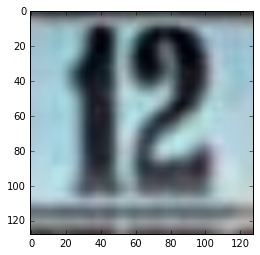

In [11]:
check_svhn_data(svhn_train_dataset, svhn_train_labels,10000)

In [12]:
svhn_train_labels = [svhn_train_labels[:,0,:],svhn_train_labels[:,1,:],svhn_train_labels[:,2,:],svhn_train_labels[:,3,:],svhn_train_labels[:,4,:],svhn_train_labels[:,5,:]]
svhn_test_labels = [svhn_test_labels[:,0,:],svhn_test_labels[:,1,:],svhn_test_labels[:,2,:],svhn_test_labels[:,3,:],svhn_test_labels[:,4,:],svhn_test_labels[:,5,:]]

In [14]:
from keras.layers import merge, Convolution2D, MaxPooling2D, Input, Dense, Flatten, Dropout
#from keras.regularizers import l2, activity_l2
from keras.models import Model

In [16]:
digit_input = Input(shape = (128 ,128, 3))

# Block 1
x = Convolution2D(8, 3, 3, activation='relu', border_mode='same', name='block1_conv1')(digit_input)
x = Convolution2D(8, 3, 3, activation='relu', border_mode='same', name='block1_conv2')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)

# Block 2
x = Convolution2D(16, 3, 3, activation='relu', border_mode='same', name='block2_conv1')(x)
x = Convolution2D(16, 3, 3, activation='relu', border_mode='same', name='block2_conv2')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)

# Block 3
x = Convolution2D(32, 3, 3, activation='relu', border_mode='same', name='block3_conv1')(x)
x = Convolution2D(32, 3, 3, activation='relu', border_mode='same', name='block3_conv2')(x)
x = Convolution2D(32, 3, 3, activation='relu', border_mode='same', name='block3_conv3')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)

# Block 4
x = Convolution2D(64, 3, 3, activation='relu', border_mode='same', name='block4_conv1')(x)
x = Convolution2D(64, 3, 3, activation='relu', border_mode='same', name='block4_conv2')(x)
x = Convolution2D(64, 3, 3, activation='relu', border_mode='same', name='block4_conv3')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)

# Block 5
x = Convolution2D(64, 3, 3, activation='relu', border_mode='same', name='block5_conv1')(x)
x = Convolution2D(64, 3, 3, activation='relu', border_mode='same', name='block5_conv2')(x)
x = Convolution2D(64, 3, 3, activation='relu', border_mode='same', name='block5_conv3')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool')(x)

x = Flatten(name='flatten')(x)
x = Dropout(0.2, name = 'drop1')(x)
x = Dense(2048, activation='relu', name='fc1')(x)
x = Dropout(0.2, name = 'drop2')(x)
x = Dense(1024, activation='relu', name='fc2')(x)
x = Dropout(0.2, name = 'drop3')(x)

outputs = []

for i in range(6):
    output = Dense(11,activation = 'softmax', name = 'output'+ str(i))(x)
    outputs.append(output)

model = Model(input = digit_input, output = outputs)

model.compile(optimizer = 'adadelta', loss = 'categorical_crossentropy',
              metrics={'output0':'accuracy','output1':'accuracy','output2':'accuracy',
                       'output3':'accuracy','output4':'accuracy','output5':'accuracy','outputs':'accuracy'})
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_2 (InputLayer)             (None, 128, 128, 3)   0                                            
____________________________________________________________________________________________________
block1_conv1 (Convolution2D)     (None, 128, 128, 8)   224         input_2[0][0]                    
____________________________________________________________________________________________________
block1_conv2 (Convolution2D)     (None, 128, 128, 8)   584         block1_conv1[0][0]               
____________________________________________________________________________________________________
block1_pool (MaxPooling2D)       (None, 64, 64, 8)     0           block1_conv2[0][0]               
___________________________________________________________________________________________

In [17]:
model.fit(
    svhn_train_dataset, svhn_train_labels,
    batch_size = 128, nb_epoch = 40, verbose=2, validation_split=0.1,
    callbacks=[TensorBoard(log_dir='/tmp/svhnmodel')])

Train on 30010 samples, validate on 3335 samples
Epoch 1/40
63s - loss: 6.3854 - output0_loss: 2.0438 - output1_loss: 2.3883 - output2_loss: 1.3862 - output3_loss: 0.3678 - output4_loss: 0.1007 - output5_loss: 0.0987 - output0_acc: 0.2665 - output1_acc: 0.1444 - output2_acc: 0.6931 - output3_acc: 0.9532 - output4_acc: 0.9954 - output5_acc: 0.9957 - val_loss: 6.0269 - val_output0_loss: 2.0268 - val_output1_loss: 2.3794 - val_output2_loss: 1.3225 - val_output3_loss: 0.2911 - val_output4_loss: 0.0049 - val_output5_loss: 0.0021 - val_output0_acc: 0.2774 - val_output1_acc: 0.1463 - val_output2_acc: 0.6966 - val_output3_acc: 0.9544 - val_output4_acc: 0.9997 - val_output5_acc: 1.0000
Epoch 2/40
61s - loss: 6.0089 - output0_loss: 2.0177 - output1_loss: 2.3807 - output2_loss: 1.3240 - output3_loss: 0.2811 - output4_loss: 0.0041 - output5_loss: 0.0013 - output0_acc: 0.2739 - output1_acc: 0.1506 - output2_acc: 0.6960 - output3_acc: 0.9569 - output4_acc: 0.9997 - output5_acc: 1.0000 - val_loss: 6.

In [18]:
model.evaluate(svhn_test_dataset, svhn_test_labels, batch_size=128, verbose=1)

13054/13054 [==============================] - 11s     

[1.1854113487037927,
 0.42977210276613048,
 0.52588554140124988,
 0.19781394102054878,
 0.030239000523628077,
 0.0016981303877912858,
 2.6292863184436709e-06,
 0.91581124590570828,
 0.90401409560694923,
 0.95886318428293205,
 0.99463765924733394,
 0.9998467914064938,
 1.0000000011506336]

In [19]:
svhn_predict_labels = model.predict(svhn_test_dataset)

In [20]:
accuracy(svhn_test_labels,svhn_predict_labels)

Model accuracy is 0.825340891681


In [21]:
def predict_to_number(predict_labels):
    prediction = np.zeros([np.array(predict_labels).shape[1], 6, 11])
    for i in range(6):
        prediction[:,i,:] = predict_labels[i]
    return prediction

In [22]:
prediction = predict_to_number(svhn_predict_labels)

In [23]:
def check_predict(img_data, prediction, numbers = 0):
    predict = []
    for i in prediction[numbers]:
        predict.append(np.argmax(i))
    print('The prediction is ', predict)
    img_data = img_data.reshape(img_data.shape[0],img_data.shape[1], img_data.shape[2], img_data.shape[3])
    plt.imshow(img_data[numbers])

('The prediction is ', [3, 4, 10, 10, 10, 10])


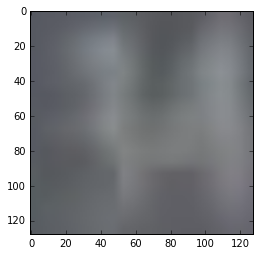

In [24]:
check_predict(svhn_test_dataset, prediction, 666)

In [25]:
with open('svhn_model.json', 'w') as f:
    f.write(model.to_json())
model.save_weights('svhn_model.h5', overwrite=True)

### 问题 4
_描述如何为模型准备训练和测试数据。 模型在真实数据集上表现怎么样？_

**回答：**

1、在准备训练和测试数据时，我首先以为问题很简单，我下载了svhn中的format2的.mat数据，但后来发现要做的不止如此，于是参考了深度学习课程中下载和处理文件的一些方法，随后[参考](https://github.com/sarahrn/Py-Gsvhn-DigitStruct-Reader)了gihub上将digitStruct.mat转换成熟悉的dataframe方法。

2、我[参考](https://github.com/znat/udacity-digit-recognition-program-svhn)了一个digit_recognition的一段代码对dataframe进行了处理，将同一张图片的信息组合起来，合成了新的dataframe。

3、我通过读取每一个dataframe的信息，将每一张图片中存在数据ufen的数据读入设置好的array。

4、我用之前处理mnist数据的方法同样处理了train和test上的labels，将其转换成[6,11]的分类变量。

之前我用一些简单的模型，每个分类器的准确率比较低，后来应用新的模型后，模型每个标签预测的准确率都达到了90以上，最终图片完全正确的准确率达到了82.5%。

### 问题 5
_你（在模型上）做了什么改变？如果做了一些改变，那么你得到一个“好的”结果了妈？有没有任何你探索的导致结果更糟？_

**回答：**

在这之前我做过很多尝试，我首先使用了简单的模型，但前两个分类器准确率一直在70-80%甚至更低的程度，我试着在tensoflow中调试了不同的学习速率，dropout值，epoch次数等等都没有让模型有更好的表现。，我认为主要的原因是因为层数较少。随后我尝试使用了cs231n中介绍的VGG模型。

一开始，我原封不动的将VGG模型的参数加入到我的模型当中，由于VGG16的模型比较大，使用aws的p2xlarge训练，一个epoch大概需要3分钟；训练4-5次之后，模型在第一和第二个分类器上的表现非常差，准确率一直在10-30%之间；但偶尔的一次训练模型收敛的非常快，非常好，但是重复之后大部分时间都不是这样的；我认为可能是模型陷入了局部最优解没办法跳出来，或者是随机权重或者relu函数使得一些关键的神经元挂掉了。所以我试着使用高级的relu函数，这时训练的loss没有减少反而增加了。准确率依然惨不忍睹。随后我还尝试增加drop层，增加正则项，减少池化层等等方法，但优化器都无法在短时间内收敛。

最终，我在读vgg16的[代码](https://github.com/fchollet/deep-learning-models)时,发现在这个模型中，输入图片的大小是224*224*3；同时对比我最初做得很小的模型，我想可能是我的圈基层核数设计的太多的原因，因此我试着减少模型的核数量，最终发现在现有的模型架构下，模型收敛的非常快。但10代之后，模型出现了过拟合的情况，因此我又在模型中加入了dropout层来避免过拟合。

### 问题 6
_当你在真实数据集做测试的时候你的初始结果和最终结果是什么？你认为你的模型在正确分类数字这个任务上上做的足够好吗？_

**回答：**

我在做测试时，前两个分类器的准确率只有60%左右，最终每个分类器的准确率都达到了90以上；我记得其中一次训练，模型在整张图片上的准确率达到了72%；而现在模型的准确率则达到了82%。如果增加extra数据集和卷积层的核数，模型的准确率还将提升。

在现有的模型架构下，训练一代的时间只需要60s，而大概在30代左右时，整体训练时间大概是30-40分钟，模型就能达到最优解，训练效率远比原有的VGG16要高很多；而根据我和老师以及伙伴讨论的结果，使用VGG架构，增加训练次数，模型最终可以达到99%的准确率，但我认为在有限的资源内我已经找到了在不加入extra数据和增加训练时间的情况下能达到的比较好的效果。

----
## 步骤 3: 在新抓取的图片上测试模型

在你周围拍摄几张数字的图片（至少五张），然后用你的分类器来预测产生结果。或者（可选），你可以尝试使用OpenCV / SimpleCV / Pygame从网络摄像头捕获实时图像，并通过你的分类器分析这些图像。

### 实现
使用下面的代码单元（必要的话可以使用多个代码单元）来实现你项目的。一旦你完成了你的实现并且获得了满意的结果，请确认全面回答下面相关的问题。

In [26]:
### 在这里实现你的代码  
### 必要的话你可以随意添加更多的代码单元 
def check_true_image(imgpath , model):
    img = cv2.imread(imgpath,3)
    #img = cv2.medianBlur(img,5)
    plt.subplot(2,2,1)
    plt.imshow(img)
    resize_img = imresize(img, size=(128,128,3))
    plt.subplot(2,2,2)
    plt.imshow(resize_img,cmap='Greys')
    img_predict_labels = model.predict(resize_img.reshape(1,128,128,3))
    img_prediction = predict_to_number(img_predict_labels)
    plt.subplot(2,2,3)
    check_predict(resize_img.reshape(1,128,128,3), img_prediction)

('The prediction is ', [4, 0, 1, 10, 10, 10])


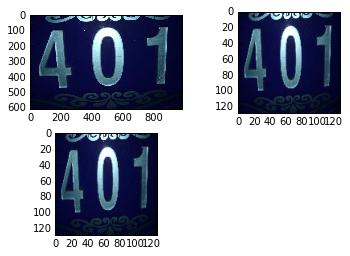

In [27]:
check_true_image('true_images/1.png', model)

('The prediction is ', [8, 3, 10, 10, 10, 10])


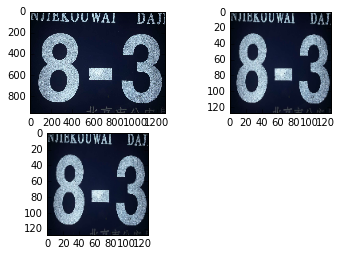

In [28]:
check_true_image('true_images/2.png', model)

('The prediction is ', [5, 8, 10, 10, 10, 10])


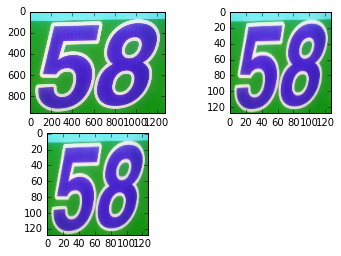

In [29]:
check_true_image('true_images/3.png', model)

('The prediction is ', [6, 3, 5, 10, 10, 10])


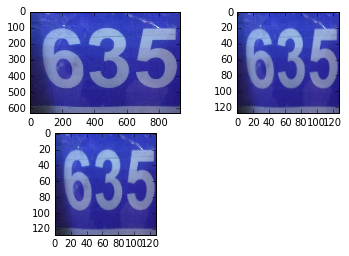

In [30]:
check_true_image('true_images/4.png', model)

('The prediction is ', [4, 3, 5, 4, 10, 10])


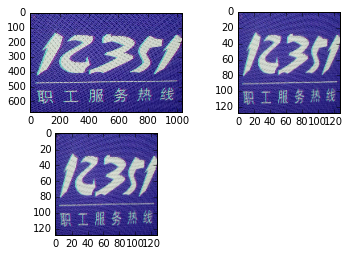

In [31]:
check_true_image('true_images/5.png', model)

### 问题 7
_选择在你周围拍摄的五张候选图片，并提供在报告中。它们中的某些图片是否有一些特殊的性质，可能会导致分类困难？_

**回答:**

5张图片都是在夜间拍摄的，其中有一些存在花纹，-，以及文字等噪音，可能导致分类困难。

其中第5张图片包含了5个数字以及很多的文字，最有可能分类困难。

我认为这主要是训练数据中大量房门号的数据都是2-3个，5个数字以上的图片很少，因此很有可能导致分类困难。

### 问题 8
_与在现实数据集上的测试结果相比，你的模型能够在捕获的图片或实时相机流上表现同样良好吗？_

**回答:**

最终的模型在捕获的图片上表现还是不错的，因为我相机的原因颜色通道是4，但同样预测对了四张图片。

### 可选: 问题 9
_如果必要的话，请提供关于你是如何建立一个使得你的模型能够加载和分类新获取图像的接口的。_

**回答:** 如果你没有完成这个部分，那么这一块请保留空白

----
### 步骤 4: 探索一种提升模型的方式

一旦你基本的分类器训练好了，你就可以做很多事情。一个例子是：（在分类的同时）还能够定位图像上数字的位置。SVHN数据集提供边界框，你可以调试以训练一个定位器。训练一个关于坐标与边框的回归损失函数，然后测试它。

### 实现
使用下面的代码单元（必要的话可以使用多个代码单元）来实现你项目的。一旦你完成了你的实现并且获得了满意的结果，请确认全面回答下面相关的问题。

In [10]:
### 在这里实现你的代码
### 必要的话你可以随意添加更多的代码单元 


In [10]:
def svhn_file_to_boxdata(dataframe, dest_folder):
    data = np.zeros([dataframe.shape[0] , 128 , 128, 3])
    labels = np.zeros([dataframe.shape[0], 4])
    for indices, row in dataframe.iterrows():
        img = cv2.imread(dest_folder + row.filename)
        left, top, right, bottom = np.array(row.box)
        left = int(float(left) / img.shape[1] * 128)
        right = int(float(right) / img.shape[1] * 128)
        top = int(float(top) / img.shape[0] * 128)
        bottom = int(float(bottom) / img.shape[0] * 128)
        labels[indices] = [left, top, right, bottom]
        resize_img = imresize(img, size=(128,128))
        data[indices] = resize_img
    return data, labels

In [11]:
train_box_data, train_box_labels = svhn_file_to_boxdata(svhn_train_df, 'svhn/train/')
test_box_data, test_box_labels = svhn_file_to_boxdata(svhn_test_df, 'svhn/test/')

In [12]:
def check_svhn_boxdata(img_data, labels, numbers = 0):
    print(labels[numbers,:])
    img_data = img_data[numbers,labels[numbers,1]:labels[numbers,3], labels[numbers,0]:labels[numbers,2],:]
    plt.imshow(img_data)

[  55.   19.   80.  100.]


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:3: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()


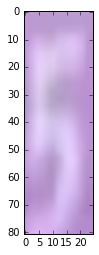

In [13]:
check_svhn_boxdata(test_box_data,test_box_labels,0)

In [15]:
digit_input = Input(shape = (128 , 128, 3))

# Block 1
x = Convolution2D(8, 3, 3, activation='relu', border_mode='same', name='block1_conv1')(digit_input)
x = Convolution2D(8, 3, 3, activation='relu', border_mode='same', name='block1_conv2')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)

# Block 2
x = Convolution2D(16, 3, 3, activation='relu', border_mode='same', name='block2_conv1')(x)
x = Convolution2D(16, 3, 3, activation='relu', border_mode='same', name='block2_conv2')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)

# Block 3
x = Convolution2D(32, 3, 3, activation='relu', border_mode='same', name='block3_conv1')(x)
x = Convolution2D(32, 3, 3, activation='relu', border_mode='same', name='block3_conv2')(x)
x = Convolution2D(32, 3, 3, activation='relu', border_mode='same', name='block3_conv3')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)

# Block 4
x = Convolution2D(64, 3, 3, activation='relu', border_mode='same', name='block4_conv1')(x)
x = Convolution2D(64, 3, 3, activation='relu', border_mode='same', name='block4_conv2')(x)
x = Convolution2D(64, 3, 3, activation='relu', border_mode='same', name='block4_conv3')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)

# Block 5
x = Convolution2D(64, 3, 3, activation='relu', border_mode='same', name='block5_conv1')(x)
x = Convolution2D(64, 3, 3, activation='relu', border_mode='same', name='block5_conv2')(x)
x = Convolution2D(64, 3, 3, activation='relu', border_mode='same', name='block5_conv3')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool')(x)

x = Flatten(name='flatten')(x)
x = Dropout(0.2, name = 'drop1')(x)
x = Dense(2048, activation='relu', name='fc1')(x)
x = Dropout(0.2, name = 'drop2')(x)
x = Dense(1024, activation='relu', name='fc2')(x)
x = Dropout(0.2, name = 'drop3')(x)

outputs = Dense(4)(x)


box_model = Model(input = digit_input, output = outputs)

box_model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics={'outputs':'mse'})

box_model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 128, 128, 3)   0                                            
____________________________________________________________________________________________________
block1_conv1 (Convolution2D)     (None, 128, 128, 8)   224         input_1[0][0]                    
____________________________________________________________________________________________________
block1_conv2 (Convolution2D)     (None, 128, 128, 8)   584         block1_conv1[0][0]               
____________________________________________________________________________________________________
block1_pool (MaxPooling2D)       (None, 64, 64, 8)     0           block1_conv2[0][0]               
___________________________________________________________________________________________

In [ ]:
box_model.fit(train_box_data,train_box_labels,
             batch_size = 128, nb_epoch = 40, verbose=2, validation_split=0.1,
              callbacks=[TensorBoard(log_dir='/tmp/boxmodel')])

Train on 30010 samples, validate on 3335 samples
Epoch 1/40
63s - loss: 331.1171 - val_loss: 106.3399
Epoch 2/40
60s - loss: 115.6678 - val_loss: 103.0862
Epoch 3/40
60s - loss: 115.2030 - val_loss: 103.2222
Epoch 4/40
60s - loss: 113.4800 - val_loss: 102.0460
Epoch 5/40
60s - loss: 110.7110 - val_loss: 104.9851
Epoch 6/40
60s - loss: 110.5619 - val_loss: 100.8994
Epoch 7/40
60s - loss: 108.3229 - val_loss: 99.7061
Epoch 8/40
60s - loss: 106.7422 - val_loss: 104.8904
Epoch 9/40
60s - loss: 90.4916 - val_loss: 76.5466
Epoch 10/40
60s - loss: 82.5608 - val_loss: 74.1092
Epoch 11/40
60s - loss: 76.4956 - val_loss: 70.7706
Epoch 12/40
60s - loss: 70.4469 - val_loss: 59.4173
Epoch 13/40
60s - loss: 63.1014 - val_loss: 52.7176
Epoch 14/40
60s - loss: 58.7426 - val_loss: 47.1433
Epoch 15/40
60s - loss: 54.8013 - val_loss: 43.9459
Epoch 16/40
60s - loss: 50.9216 - val_loss: 43.4093
Epoch 17/40
60s - loss: 48.4550 - val_loss: 46.3136
Epoch 18/40
60s - loss: 47.5889 - val_loss: 39.3980
Epoch 19/

In [17]:
box_model.evaluate(test_box_data, test_box_labels, batch_size=128, verbose=0)

88.573193414079412

In [18]:
predict_box = box_model.predict(test_box_data)

In [19]:
def check_box_data(test_box_data,test_box_labels, predict_box,numbers = 0):
    plt.subplot(1,2,1)
    check_svhn_boxdata(test_box_data,predict_box.astype(np.int),numbers)
    plt.subplot(1,2,2)
    check_svhn_boxdata(test_box_data,test_box_labels,numbers)

[75 23 95 71]
[ 69.  13.  93.  82.]


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:3: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()


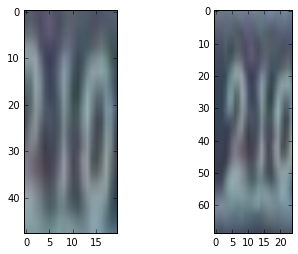

In [20]:
check_box_data(test_box_data,test_box_labels, predict_box, 1)

In [21]:
def check_true_data(img_path):
    img = cv2.imread(img_path,3)
    resize_img = imresize(img, size=(128,128,3))
    plt.subplot(1,2,1)
    plt.imshow(resize_img)
    plt.subplot(1,2,2)
    check_svhn_boxdata(resize_img.reshape(1,128,128,3),box_model.predict(resize_img.reshape(1,128,128,3)).astype(np.int))

[54 23 78 87]


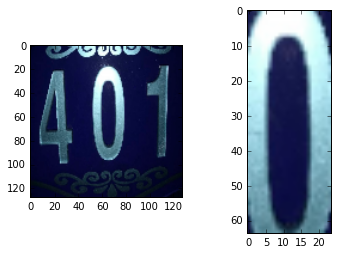

In [22]:
check_true_data('true_images/1.png')

[45 14 69 73]


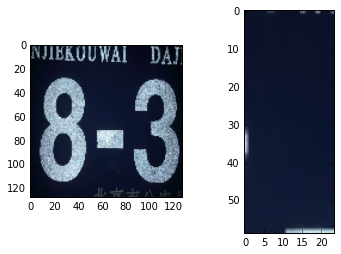

In [23]:
check_true_data('true_images/2.png')

[ 30  17  99 115]


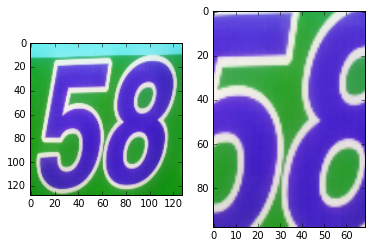

In [24]:
check_true_data('true_images/3.png')

[36 15 81 94]


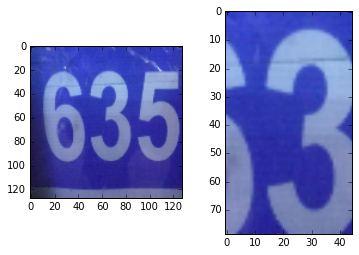

In [25]:
check_true_data('true_images/4.png')

[44 33 70 75]


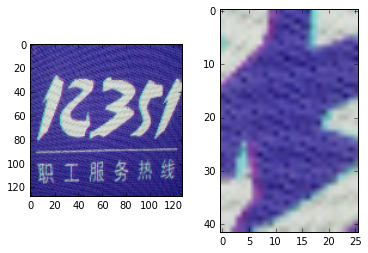

In [26]:
check_true_data('true_images/5.png')

### 问题 10
_你的模型在真实数据的测试集上定位数字表现的怎么样？包含位置信息之后你的分类结果有变化吗？_

**回答：**

我将每张图片resize成（128*128）的图片，模型在测试数据定位数字的mse达到了90左右，经过观察，在测试数据集上的表现与实际边框还有一定的差距。

我在训练模型时，已经根据边界切割了图片，如果使用包含位置信息的分类器，效果可能会比原来要弱。

### 问题 11
在你在**步骤3 **所捕获的图像上测试你的定位功能。模型是否准确计算出你找到的图像中的数字的边界框？如果你没有使用图形界面，您可能需要手动探索边界框。_提供一个在捕获的图像上创建边界框的示例_。

**回答：**
模型在真实数据集上计算的不是准确，其中只有一张图片找到了所有的数字，我认为可能的原因是真实图片与原有svhn数据中的照片不一样，我拍摄的图片中，数字几乎都占满了整张图片，而房门数据集中却只是在其中的一个部分。另外，我认为可能的原因是我设计的是图片中整个号码区域的边框，因此很有可能因为长度不一致的分布使得模型没办法一次分辨所有的信息。



----
## 可选步骤 5：为模型封装一个应用或者是程序

为了让你的项目更进一步。如果你有兴趣，可以构建一个安卓应用程序，或者是一个更鲁棒的Python程序。这些程序能够和输入的图像交互，显示分类的数字甚至边界框。比如，你可以尝试通过将你的答案叠加在图像上像[Word Lens](https://en.wikipedia.org/wiki/Word_Lens)应用程序那样来构建一个增强现实应用程序。

如何在安卓上的相机应用程序中加载TensorFlow的模型的示例代码在[TensorFlow Android demo app](https://github.com/tensorflow/tensorflow/tree/master/tensorflow/examples/android)中，你可以再这个基础上做一些简单的修改。


如果你决定探索这条可选路径，请务必记录你的接口和实现，以及你找到的重要结果。你可以通过[点击这个链接](https://review.udacity.com/#!/rubrics/413/view)看到将被用来评价你的工作的相关条目。

### 可选 实现
使用下面的代码单元（必要的话可以使用多个代码单元）来实现你项目的。一旦你完成了你的实现并且获得了满意的结果，请确认全面回答下面相关的问题。

In [ ]:


### 在这里实现你的代码  
### 必要的话你可以随意添加更多的代码单元 



### 文档
请提供额外的文档，这些文档要足以详细说明安卓应用程序或Python程序如何实现可视化图像中数字的分类。你的描述应该清楚描述程序或应用程序的工作原理并提供一些演示。

_在这里写你的文档_

> **注意:** 当你写完了所有的代码，并且回答了所有的问题。你就可以把你的 iPython Notebook 导出成 HTML 文件。你可以在菜单栏，这样导出**File -> Download as -> HTML (.html)**把这个 HTML 和这个 iPython notebook 一起做为你的作业提交。